Chapter 14

# 稳态向量
Book_4《矩阵力量》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码模拟了一个两种状态（鸡和兔）之间的状态转移过程，主要利用转移矩阵$T$的迭代作用来观察状态变化，直到系统趋于稳态。具体步骤如下：

1. **定义转移矩阵$T$**：  
   代码首先定义了一个$2 \times 2$的转移矩阵：
   $$
   T = \begin{bmatrix} 0.7 & 0.2 \\ 0.3 & 0.8 \end{bmatrix}
   $$
   该矩阵表示在每个时间步长中，鸡和兔从一种状态转移到另一种状态的概率。

2. **计算稳态向量**：  
   程序接着通过求解转移矩阵$T$的特征向量来得到其稳态。稳态向量$sstate$可以表示为：
   $$
   T \cdot sstate = sstate
   $$
   使用NumPy的`eig`函数得到特征向量，并将其归一化，以确保元素和为1。

3. **定义初始状态矩阵并进行多次迭代**：  
   程序为鸡和兔定义了多个初始状态，分别是：
   $$
   initial\_x\_array = \begin{bmatrix} 1 & 0 & 0.5 & 0.4 \\ 0 & 1 & 0.5 & 0.6 \end{bmatrix}
   $$
   其中每列代表不同的初始概率配置。在每次迭代中，从这些初始状态开始，逐步计算下一状态，迭代的数量设置为$num\_iterations = 10$。

4. **状态转移迭代过程**：  
   对于每个初始状态，程序通过以下公式逐步计算转移：
   $$
   x_{i+1} = T \cdot x_i
   $$
   每次迭代后，$x_i$代表的状态会向稳态收敛，将每步的结果存储在$X$中，以便后续绘图。

5. **绘制状态变化图**：  
   程序为每个初始状态绘制迭代次数$k$与状态（鸡和兔的概率）的关系图。横轴为迭代步数，纵轴为状态概率。鸡的状态用红色线表示，兔的状态用蓝色线表示。通过观察这些曲线，可以直观地看到系统从初始状态向稳态的收敛过程。

总结来说，此代码演示了马尔可夫链在状态转移矩阵的作用下，通过迭代逐步趋于稳态的过程。

## 导入所需的库

In [1]:
import numpy as np  # 导入NumPy库
import matplotlib.pyplot as plt  # 导入Matplotlib库用于绘图

## 定义转移矩阵

In [2]:
T = np.matrix([[0.7, 0.2],  # 定义转移矩阵T的元素
               [0.3, 0.8]])  # 转移概率的矩阵

## 计算稳态向量

In [3]:
sstate = np.linalg.eig(T)[1][:,1]  # 获取转移矩阵T的稳态特征向量
sstate = sstate/sstate.sum()  # 归一化稳态向量
print(sstate)  # 输出稳态向量

[[0.4]
 [0.6]]


## 定义初始状态

In [4]:
initial_x_array = np.array([[1, 0, 0.5, 0.4],  # 鸡的初始状态
                            [0, 1, 0.5, 0.6]])  # 兔的初始状态

num_iterations = 10  # 设置迭代次数

## 遍历每个初始状态进行状态转移

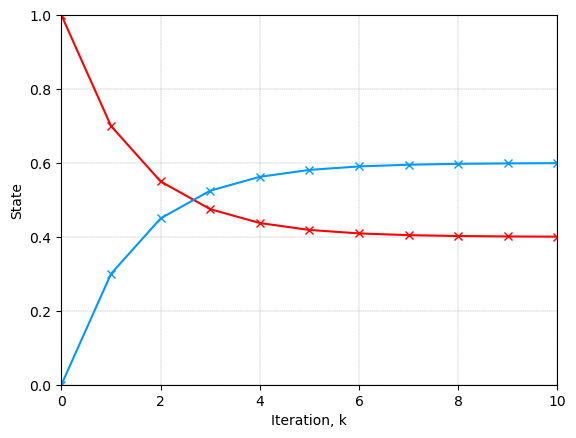

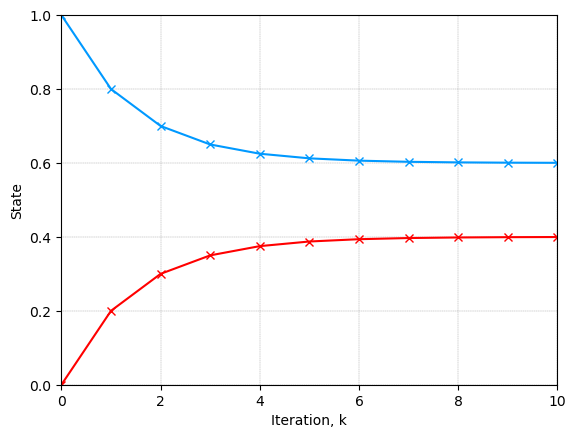

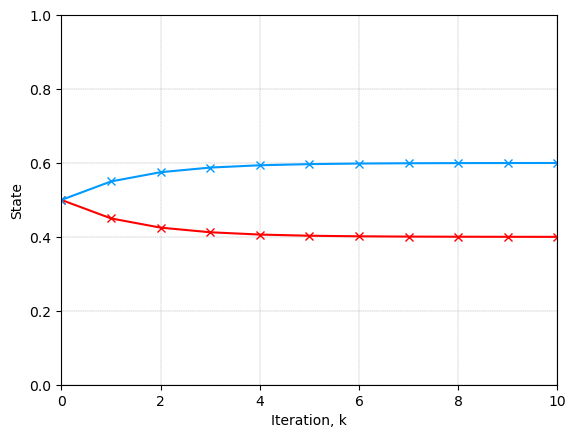

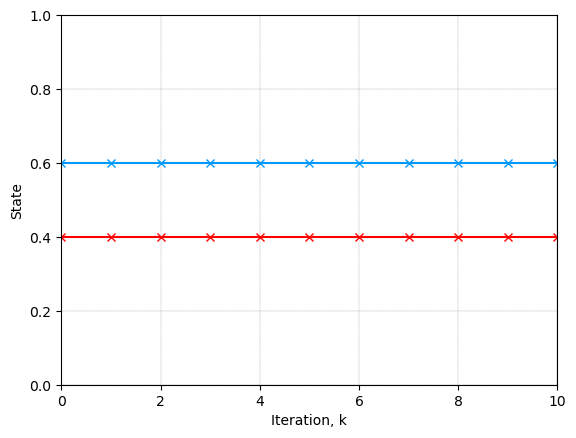

In [5]:
for i in np.arange(0,4):
    
    initial_x = initial_x_array[:,i][:, None]  # 提取第i个初始状态
    
    x_i = np.zeros_like(initial_x)  # 初始化当前状态变量
    x_i = initial_x  # 将当前状态设置为初始状态
    X = initial_x.T  # 记录初始状态的转置形式
    
    ## 通过迭代计算状态转移
    for x in np.arange(0,num_iterations):
        x_i = T @ x_i  # 应用转移矩阵T进行状态转移
        X = np.concatenate([X, x_i.T], axis=0)  # 将转移后的状态添加到X中
    
    fig, ax = plt.subplots()  # 创建绘图对象
    
    itr = np.arange(0, num_iterations + 1)  # 定义迭代次数范围
    plt.plot(itr, X[:,0], marker='x', color=(1, 0, 0))  # 绘制鸡的状态变化曲线
    plt.plot(itr, X[:,1], marker='x', color=(0, 0.6, 1))  # 绘制兔的状态变化曲线
    
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # 设置网格线样式
    ax.set_xlim(0, num_iterations)  # 设置x轴范围
    ax.set_ylim(0, 1)  # 设置y轴范围
    ax.set_xlabel('Iteration, k')  # 设置x轴标签
    ax.set_ylabel('State')  # 设置y轴标签